In [1]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn. feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier,XGBRegressor
import seaborn as sns
from sklearn.metrics import roc_curve

In [2]:
#printing the stopwords in english we are

print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [3]:
news_dataset=pd.read_csv('train.csv')
news_dataset

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [4]:
news_dataset.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [5]:
#filling the missing values with an empty string because this data is enough for our model

news_dataset=news_dataset.fillna(' ')

In [6]:
news_dataset

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


<AxesSubplot:xlabel='label', ylabel='count'>

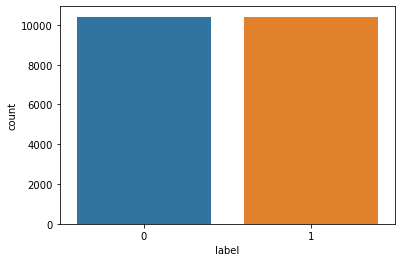

In [7]:
#plotting fake real news variable

sns.countplot(x=news_dataset["label"])



In [8]:
#merging author and title column together because it gives a better accuracy instead of text column 


news_dataset['content']=news_dataset['author']+' '+ news_dataset['title']

news_dataset['content']

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object

In [9]:
#seperating data and label column

#removing column axis=1

X= news_dataset.drop(columns='label',axis=1)

Y=news_dataset['label'] #storing the target variable in a new column


In [10]:
#applying stemming technique

#process of reducing a word to root word

port_stem = PorterStemmer()

In [11]:
def stemming(content):
    
    #taking A-Z and a-z set becuase we only want strings not commas,puntuation , numbers etc they will be removed and replaced by a space
    
    stemmed_content= re.sub('[^a-zA-Z]',' ', content) #regular expression library searching paragaraph for text # sub subtitues certain values 
     
    #conversion all letters to lower letters
    
    stemmed_content= stemmed_content.lower()
    
     #splitting all letters to list

    stemmed_content= stemmed_content.split()

    stemmed_content=[port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')] #condition to stem only those words which are not in the stopwords

    stemmed_content = ' '.join(stemmed_content)

    return stemmed_content

In [12]:
news_dataset['content']=news_dataset['content'].apply(stemming) #applying the stemming function on content column
news_dataset['content']

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object

In [13]:
#separating data and label

X_con=news_dataset['content'].values #content column in X
Y= news_dataset['label'].values  #label variable in Y

X_con

array(['darrel lucu hous dem aid even see comey letter jason chaffetz tweet',
       'daniel j flynn flynn hillari clinton big woman campu breitbart',
       'consortiumnew com truth might get fire', ...,
       'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time',
       'alex ansari nato russia hold parallel exercis balkan',
       'david swanson keep f aliv'], dtype=object)

In [14]:
#converting textual data to numerical data

#idf stands for inverse document frequency repeating words which are not important for the model

vectorizer=TfidfVectorizer()  #no of times a word is repeating in a document so repetition tells the model that word is very important so it assigns a value to it

vectorizer.fit(X_con)

X_new=vectorizer.transform(X_con)  #conversion of values to respective features

## (0 is the index and 15686 are the no of rows) 0.284 is he feature importance of that particular word in the document

print(X_new)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

In [15]:
vectorizer.get_feature_names_out()

array(['aa', 'aaa', 'aap', ..., 'zwo', 'zwyghuizen', 'zzz'], dtype=object)

In [16]:
X_new_train, X_new_test, Y_train, Y_test = train_test_split(X_new, Y, test_size = 0.2, stratify=Y, random_state=2)

# Logistic Regression

In [17]:
#training model logistic regression 
model_log = LogisticRegression()
model_log.fit(X_new_train, Y_train)

LogisticRegression()

In [18]:
pred_log = model_log.predict(X_new_test)

In [19]:
# accuracy score on the training data
X_train_prediction = model_log.predict(X_new_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9865985576923076


In [20]:
# accuracy score on the test data
X_test_prediction = model_log.predict(X_new_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9790865384615385


In [21]:
print(X_new_test[2000]) #what word was predicted is displayed here here we are shown the numerical values because we have not converted them into scalar form


  (0, 15355)	0.24889201694093613
  (0, 5660)	0.2936022754595019
  (0, 5129)	0.38940121001413086
  (0, 5074)	0.3381687078753294
  (0, 4128)	0.3450843552829568
  (0, 2704)	0.28672397151478013
  (0, 2022)	0.4066549153667123
  (0, 1894)	0.13196766909799978
  (0, 1517)	0.22393805853346518
  (0, 68)	0.38940121001413086


In [22]:
#predicting the news

X_news = X_new_test[100]

prediction = model_log.predict(X_news)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')


[0]
The news is Real


Text(83.40000000000006, 0.5, 'Actual')

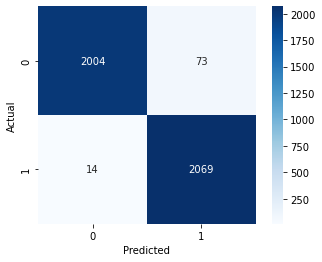

In [26]:

matrix_confusion= confusion_matrix(Y_test, pred_log)
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [29]:
report= classification_report(Y_test, pred_log)
report

'              precision    recall  f1-score   support\n\n           0       0.99      0.96      0.98      2077\n           1       0.97      0.99      0.98      2083\n\n    accuracy                           0.98      4160\n   macro avg       0.98      0.98      0.98      4160\nweighted avg       0.98      0.98      0.98      4160\n'

# Decision tree classifier

In [31]:
model_decision= DecisionTreeClassifier(criterion='entropy', random_state=100, max_depth=3, min_samples_leaf=5)
model_decision.fit(X_new_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

# XG Boost Classifier

In [32]:
model_xg = XGBClassifier()
model_xg.fit(X_new_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

# AUC ROC Curve

In [33]:
#predicting probabilities

pred_prob1 = model_log.predict_proba(X_new_test)
pred_prob2 = model_decision.predict_proba(X_new_test)
pred_prob3 = model_xg.predict_proba(X_new_test)

# roc curve for models

fpr1, tpr1, thresh1 = roc_curve(Y_test, pred_prob1[:,1], pos_label=1) # for logistic regression
fpr2, tpr2, thresh2 = roc_curve(Y_test, pred_prob2[:,1], pos_label=1) #for decision tree
fpr3, tpr3, thresh3 = roc_curve(Y_test, pred_prob3[:,1], pos_label=1) #for XG Boost classifier

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)

from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(Y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(Y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(Y_test, pred_prob3[:,1])

print('Logistic Regression', auc_score1, 'Decision Tree',auc_score2, 'XG Boost',auc_score3)



Logistic Regression 0.9978369962400532 Decision Tree 0.9279647863542615 XG Boost 0.9974283415437949


# Plotting Curve

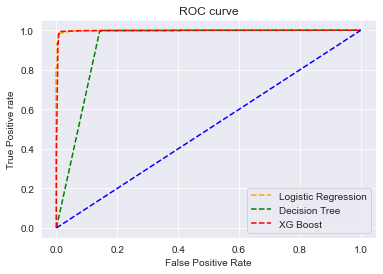

In [34]:
sns.set_style('darkgrid')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Decision Tree')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='XG Boost')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();